In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('values.csv')
df_label=pd.read_csv('labels.csv')

In [ ]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [ ]:
df_label.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [ ]:
df_label.drop('patient_id',axis=1,inplace=True)

In [ ]:
df=pd.concat([df,df_label],axis=1)

In [ ]:
df.head(2)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0


In [ ]:
df=df.rename(columns={'slope_of_peak_exercise_st_segment':'slope_peak','resting_blood_pressure':'resting_bp','fasting_blood_sugar_gt_120_mg_per_dl':'fasting(120mg/dl)','resting_ekg_results':'resting_ekg','serum_cholesterol_mg_per_dl':'cholestrol','oldpeak_eq_st_depression':'oldpeak_dep','max_heart_rate_achieved':'max_heart_rate','exercise_induced_angina':'exercise_angina','heart_disease_present':'disease'})

In [ ]:
df.head(2)

,patient_id,slope_peak,thal,resting_bp,chest_pain_type,num_major_vessels,fasting(120mg/dl),resting_ekg,cholestrol,oldpeak_dep,sex,age,max_heart_rate,exercise_angina,disease
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0


In [ ]:
df.shape

(180, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         180 non-null    object 
 1   slope_peak         180 non-null    int64  
 2   thal               180 non-null    object 
 3   resting_bp         180 non-null    int64  
 4   chest_pain_type    180 non-null    int64  
 5   num_major_vessels  180 non-null    int64  
 6   fasting(120mg/dl)  180 non-null    int64  
 7   resting_ekg        180 non-null    int64  
 8   cholestrol         180 non-null    int64  
 9   oldpeak_dep        180 non-null    float64
 10  sex                180 non-null    int64  
 11  age                180 non-null    int64  
 12  max_heart_rate     180 non-null    int64  
 13  exercise_angina    180 non-null    int64  
 14  disease            180 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 21.2+ KB


In [ ]:
df.describe()

,slope_peak,resting_bp,chest_pain_type,num_major_vessels,fasting(120mg/dl),resting_ekg,cholestrol,oldpeak_dep,sex,age,max_heart_rate,exercise_angina,disease
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
patient_id,0
slope_peak,0
thal,0
resting_bp,0
chest_pain_type,0
num_major_vessels,0
fasting(120mg/dl),0
resting_ekg,0
cholestrol,0
oldpeak_dep,0


In [ ]:
df1=df.drop(['patient_id','thal'],axis=1)
df1.head(2)

,slope_peak,resting_bp,chest_pain_type,num_major_vessels,fasting(120mg/dl),resting_ekg,cholestrol,oldpeak_dep,sex,age,max_heart_rate,exercise_angina,disease
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0


**Univarient** **Analysis**

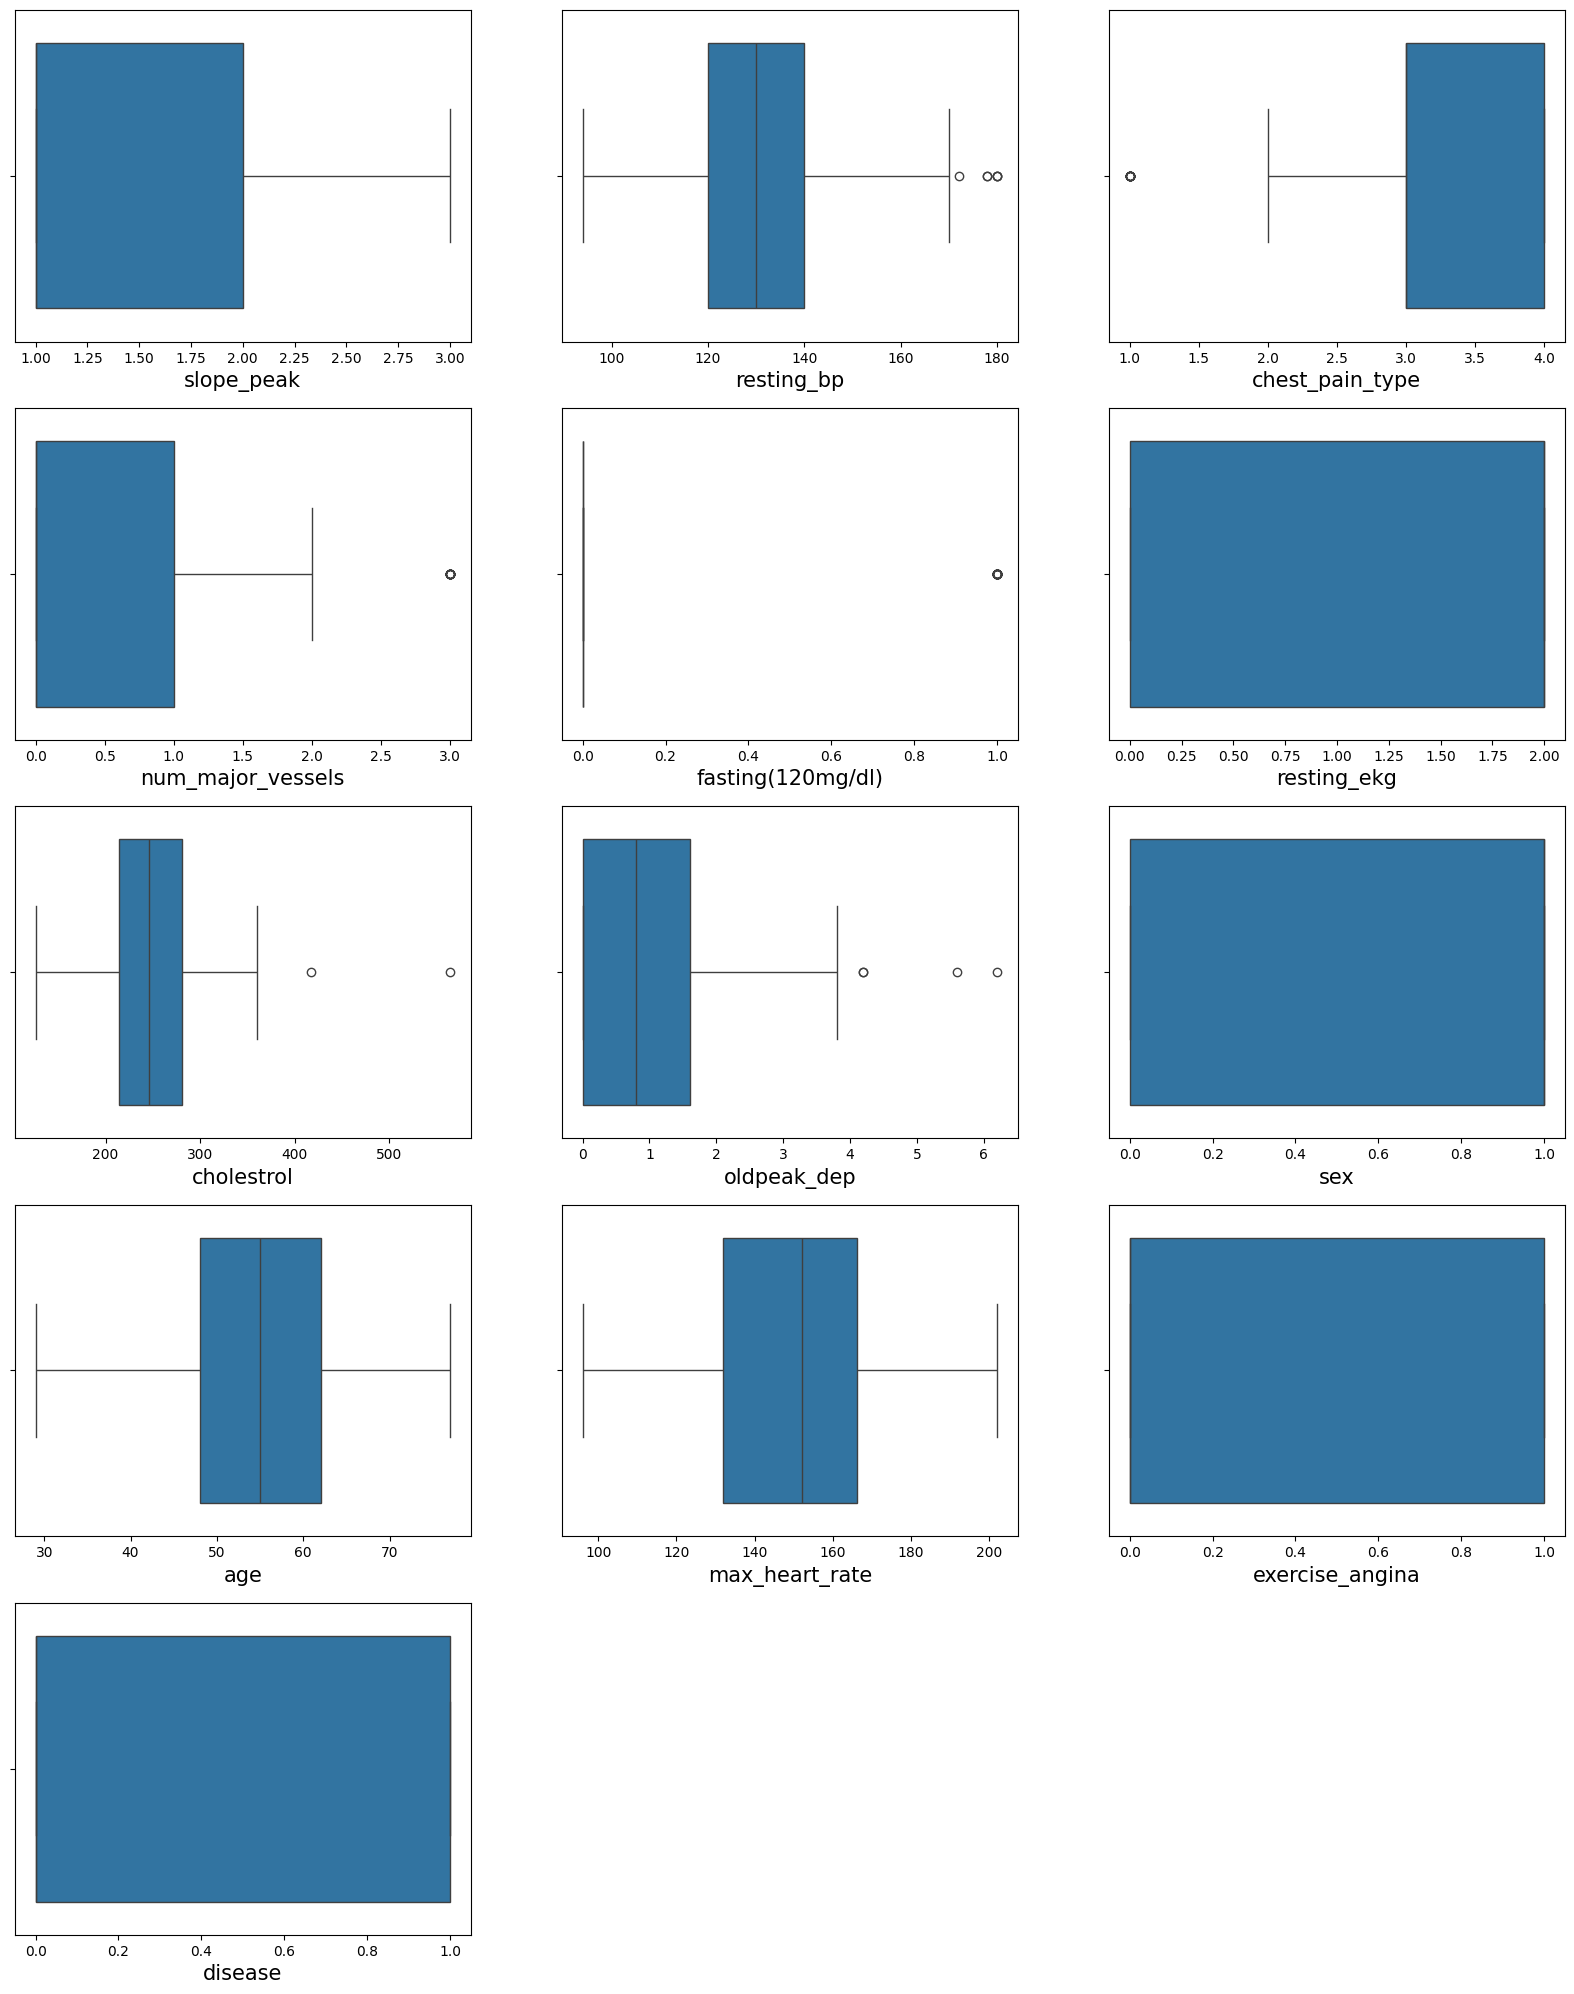

In [ ]:
plt.figure(figsize=(20,25))
plot=1
for i in df1.columns:
    plt.subplot(5,3,plot)
    sns.boxplot(x=df1[i])
    plt.xlabel(i,fontsize=15)
    plot+=1
plt.show()

Function to handle outliers

In [ ]:
def outliers(df,column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    LB = Q1 - (1.5 * IQR)
    UB = Q3 + (1.5 * IQR)

    mean_value = df[column].mean()

    df[column] = np.where((df[column] < LB) | (df[column] > UB), mean_value, df[column])

    return df

In [ ]:
df1=outliers(df1,'cholestrol')
df1=outliers(df1,'resting_bp')
df1=outliers(df1,'num_major_vessels')
df1=outliers(df1,'oldpeak_dep')

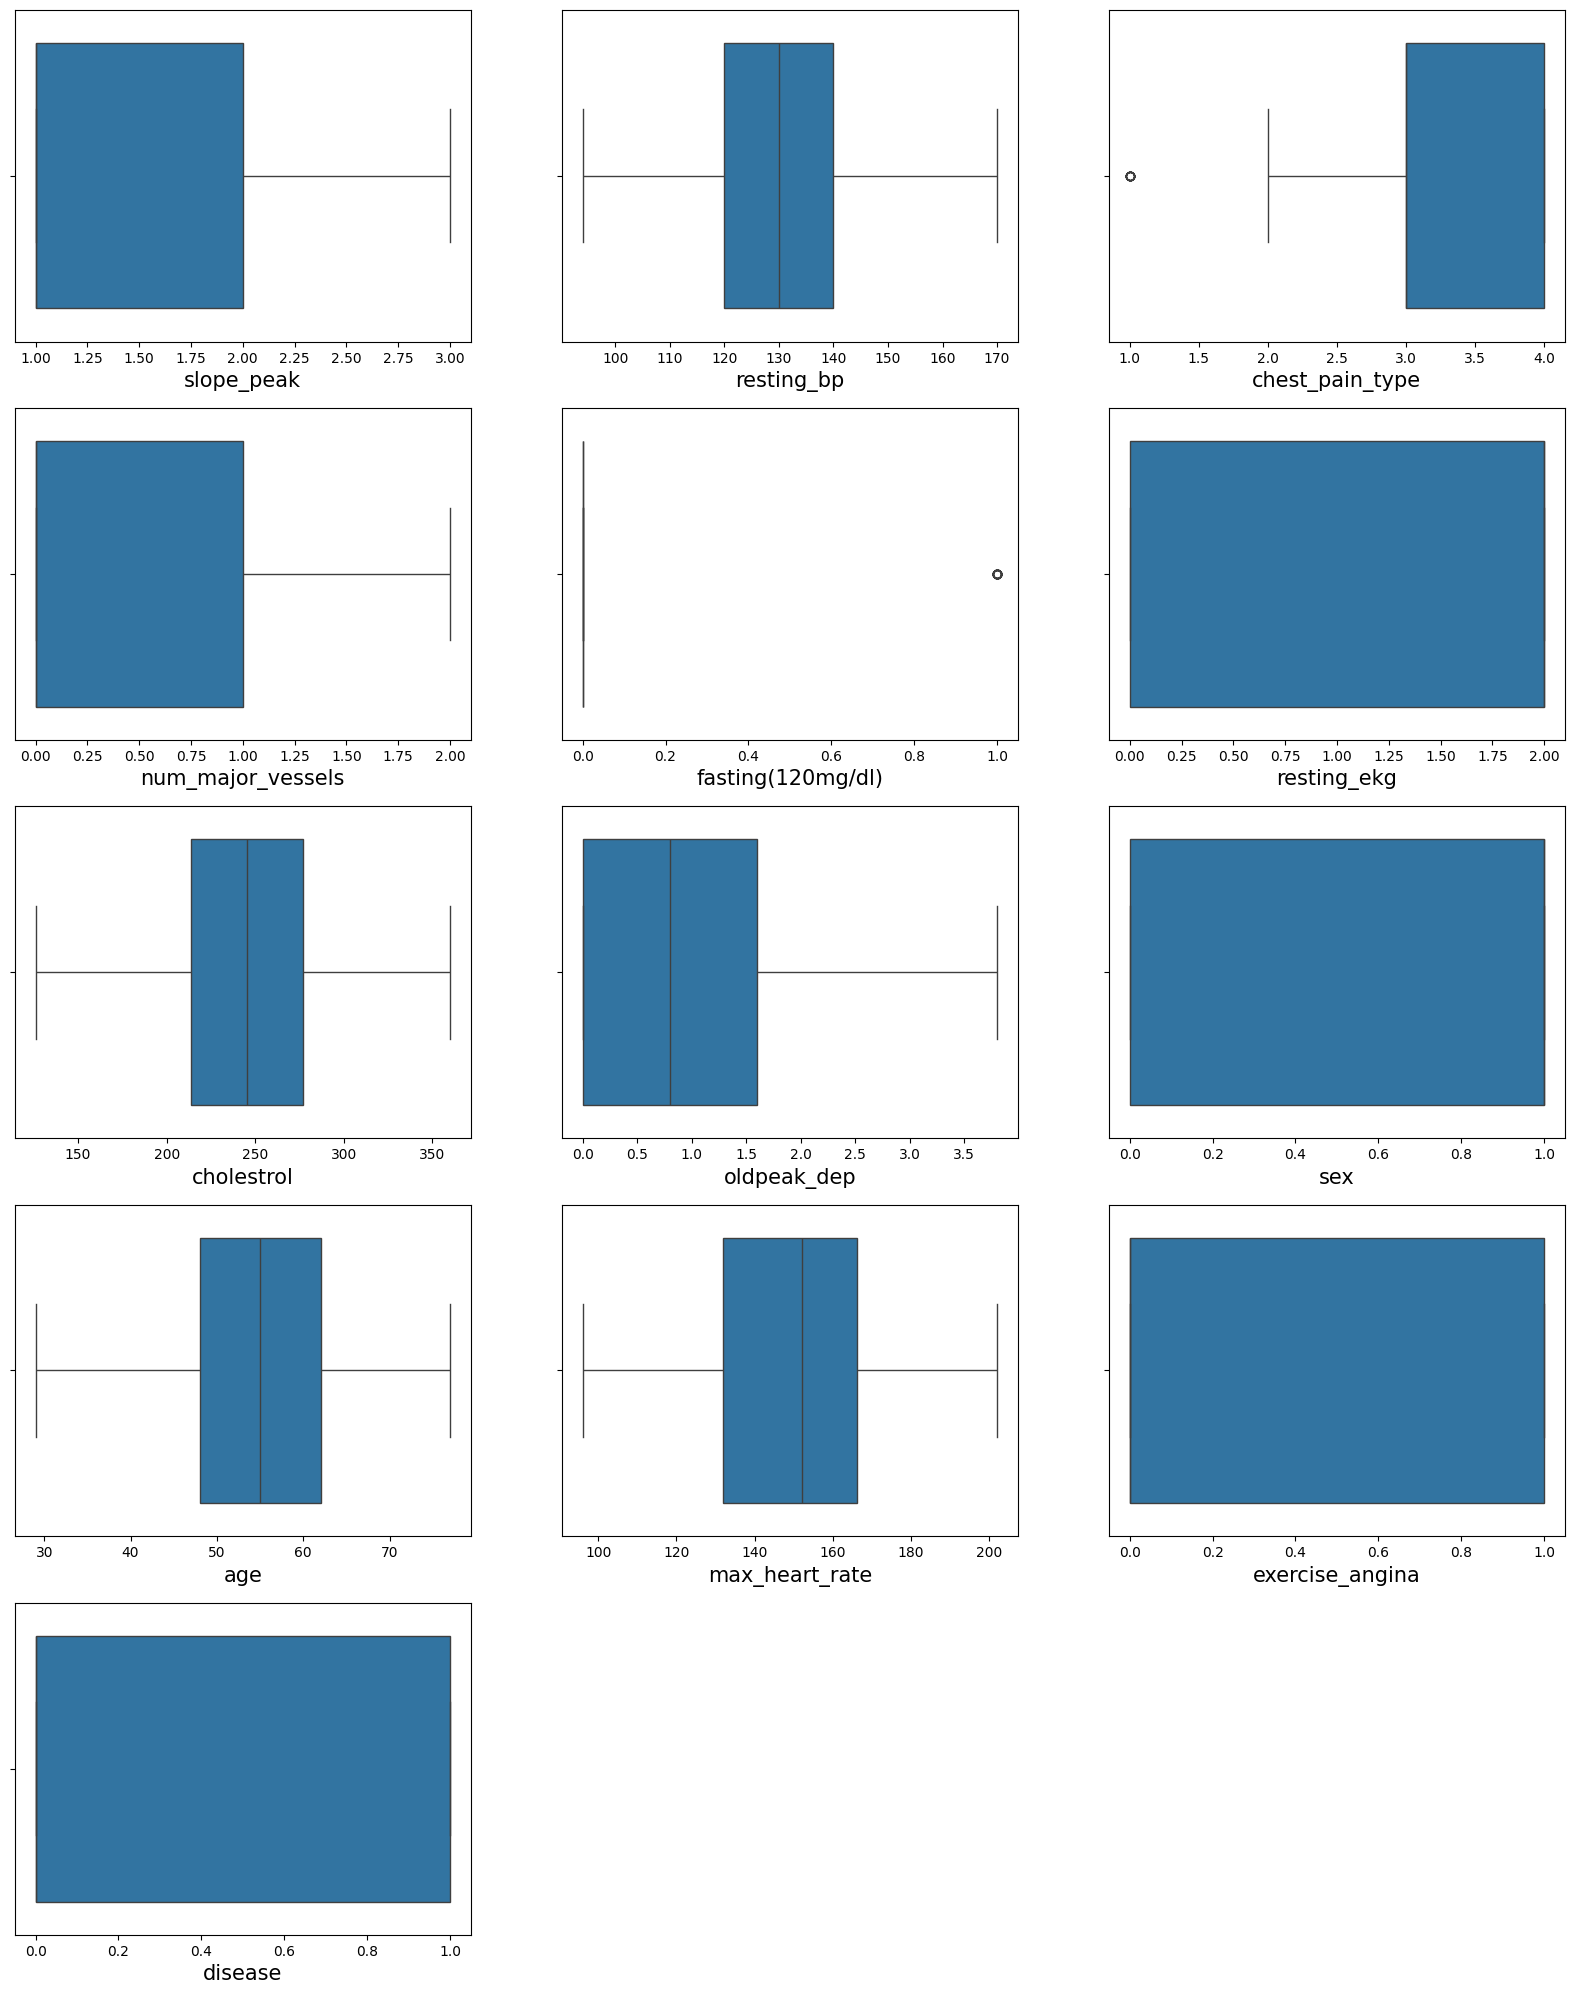

In [ ]:
plt.figure(figsize=(20,25))
plot=1
for i in df1.columns:
    plt.subplot(5,3,plot)
    sns.boxplot(x=df1[i])
    plt.xlabel(i,fontsize=15)
    plot+=1
plt.show()

**Bi-varient Analysis**

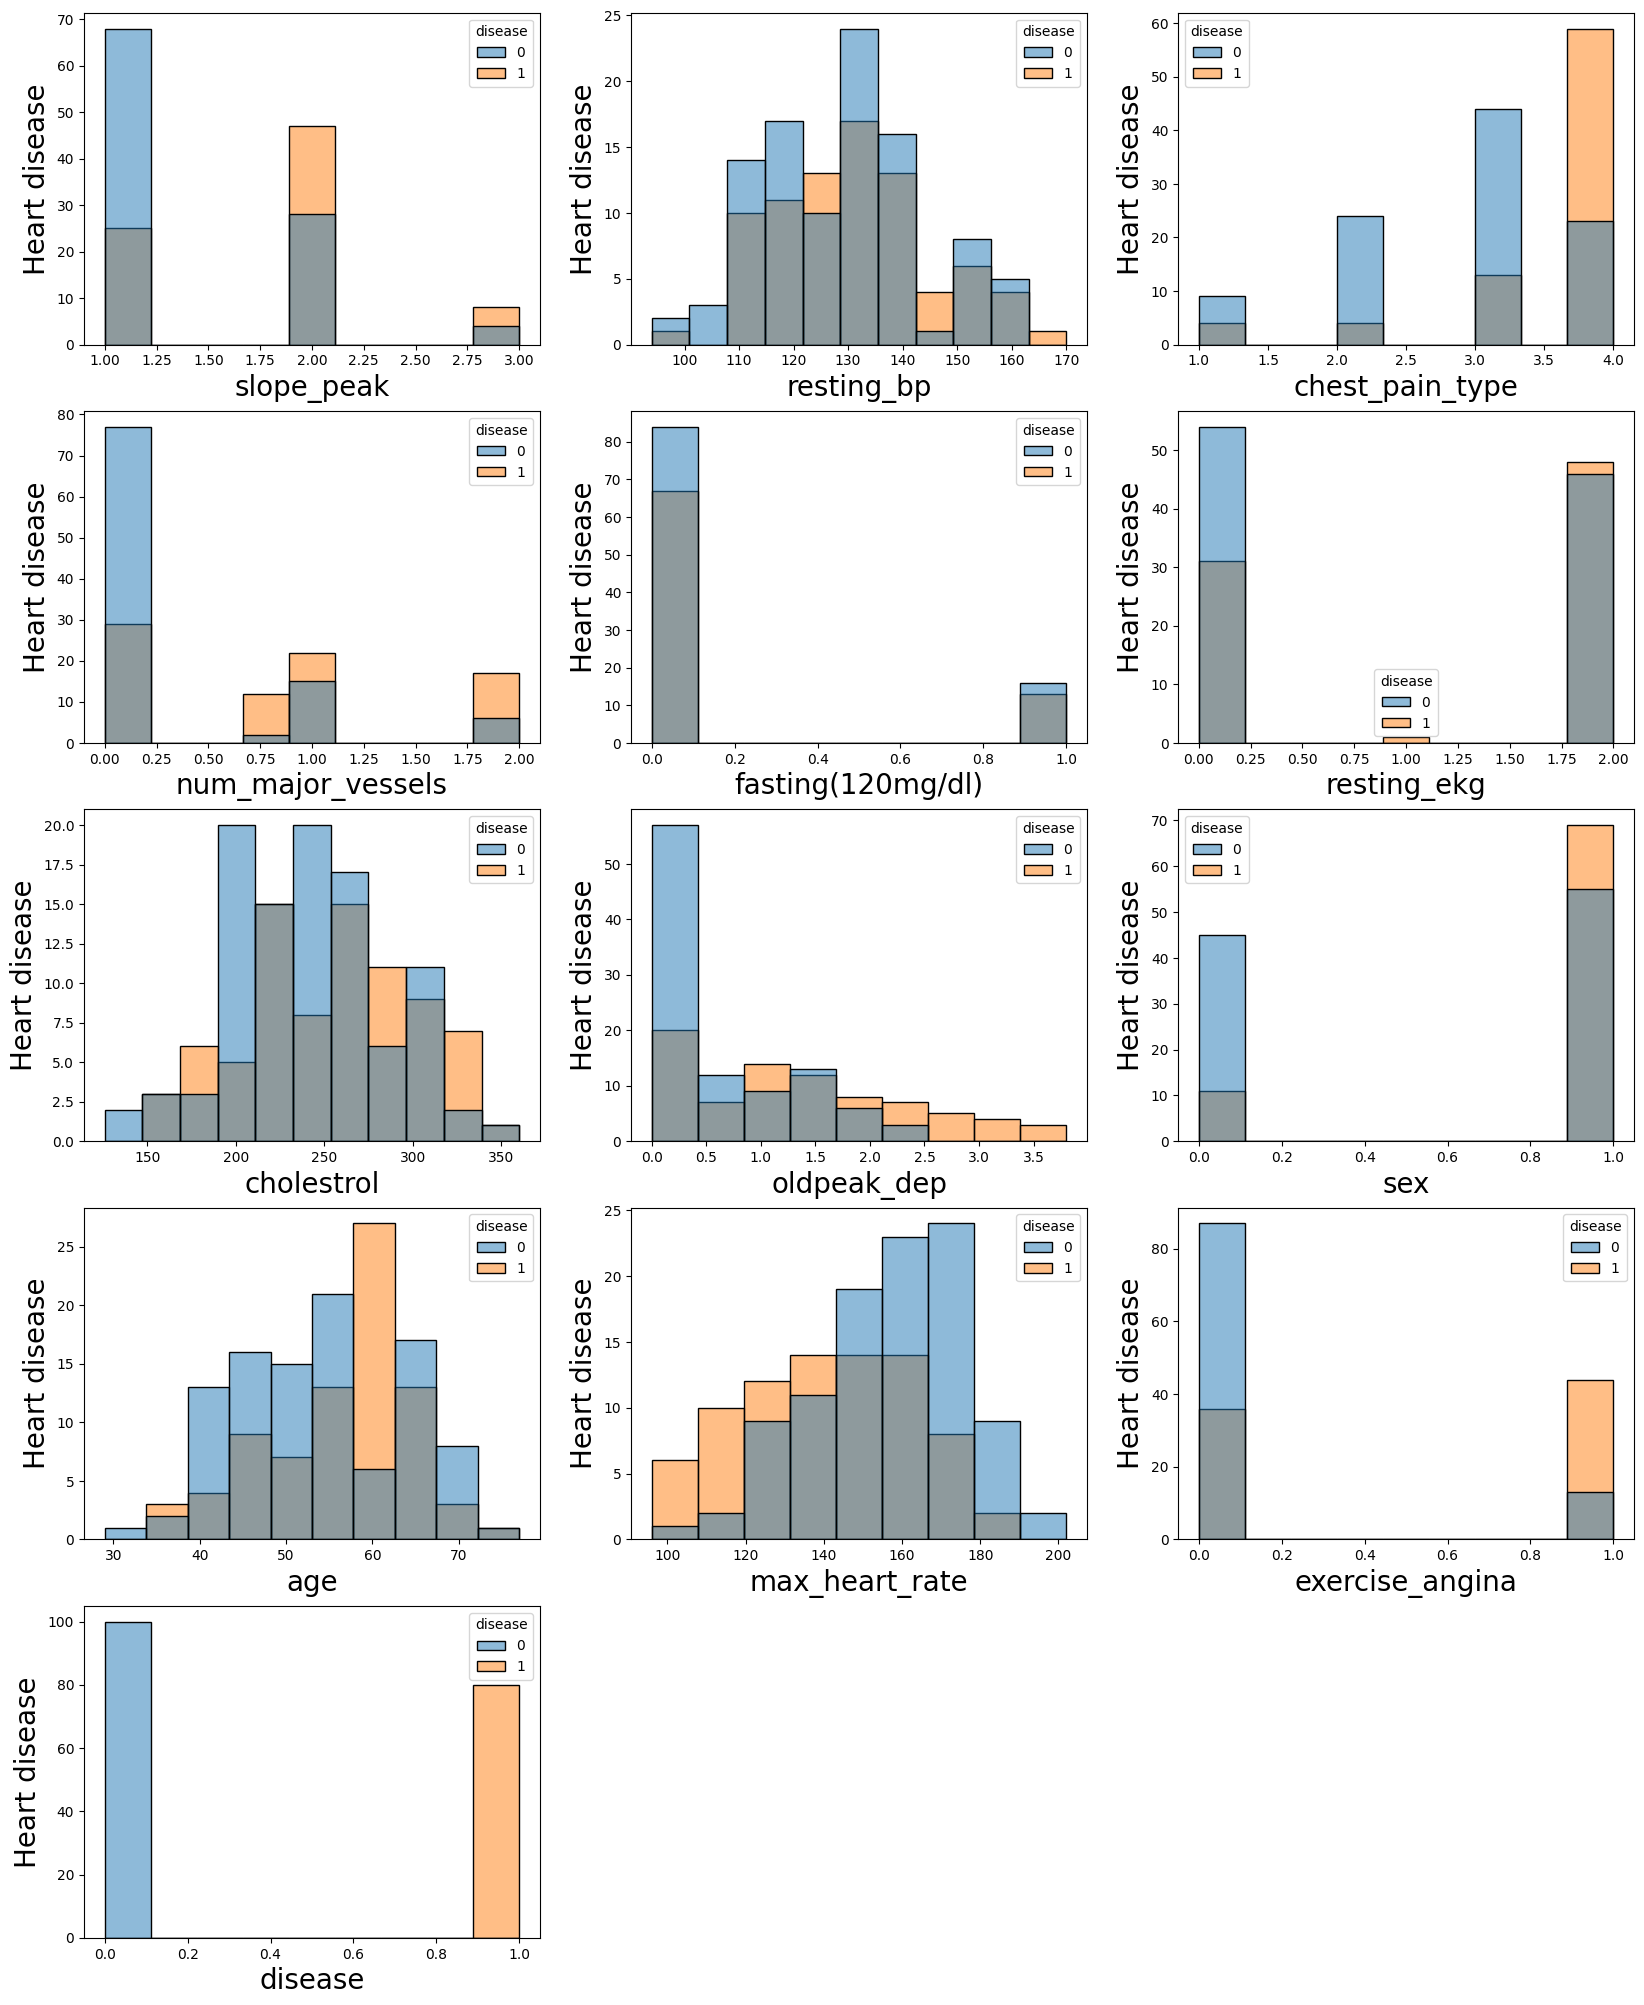

In [ ]:
plt.figure(figsize=(20,25))
plot=1
for i in df1.columns:
    plt.subplot(5,3,plot)
    sns.histplot(x=df1[i],hue=df1['disease'])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Heart disease',fontsize=20)
    plot+=1
plt.show()

**Analysis from the above plots**
* It is obserrved that fasting has less impact on the heart disease.
* It is observed that disease occur mostly in Type-4 chest pain.
* It is observed that disease is equally distributed in all types of Major Vessels.
* It is observed that disease is 2 and 1 values of resting electrocardiographic results.
* It is observed that disease occurs mostly in males.
* It is observed that people at age 60 tend to have more heart  disease.
* It is observed the disease occurs mostly with the heart rate of 100-160 beats per minute.
* It is observed that exercise-induced chest pain has more proven to cause heart disease.
* In other parameters the health disease is almost equally distributed.


<Axes: >

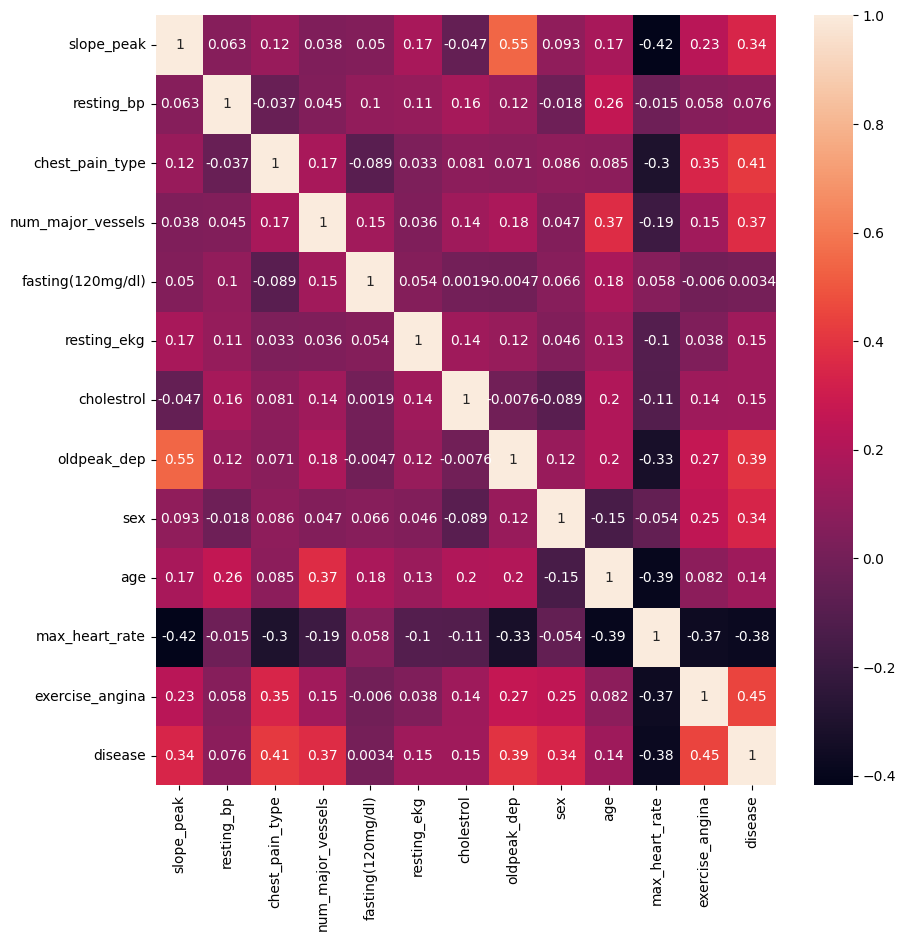

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True)

**Observation**
* We can see that there max_heart_rate affect the data with multicollinearity. Hence we drop it.

<Axes: xlabel='oldpeak_dep', ylabel='slope_peak'>

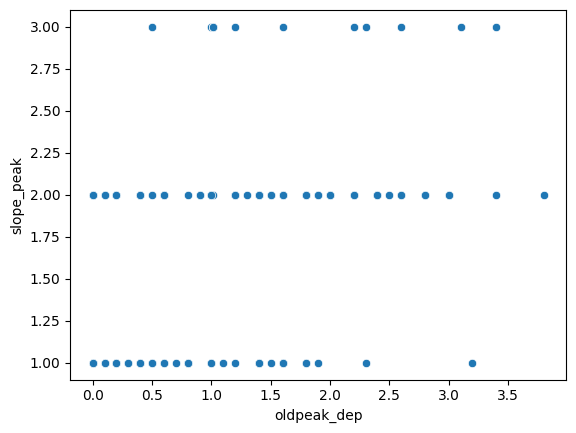

In [ ]:
sns.scatterplot(x='oldpeak_dep', y='slope_peak', data = df1)

Ischemia is a condition where there is a reduced blood flow and, consequently, a decreased supply of oxygen to a part of the body. In the context of heart health, ischemia typically refers to myocardial ischemia, which occurs when the heart muscle (myocardium) doesn't get enough oxygen-rich blood.

1.00 - Upsloping: The points may cluster towards lower oldpeak_dep values, indicating less depression and a more normal heart response.

2.00 - Horizontal: The points may have a wider range of oldpeak_dep values, indicating varying levels of ischemia.

3.00 - Downsloping: The points might cluster towards higher oldpeak_dep values, indicating significant ischemia.

In [ ]:
df1['slope_peak'].value_counts()

,count
slope_peak,
1,93
2,75
3,12


In [ ]:
correlation_matrix = df1['slope_peak'].corr(df1['oldpeak_dep'])
correlation_matrix

0.5453901277392832

In [ ]:
df1.head()

,slope_peak,resting_bp,chest_pain_type,num_major_vessels,fasting(120mg/dl),resting_ekg,cholestrol,oldpeak_dep,sex,age,max_heart_rate,exercise_angina,disease
0,1,128.000000,2,0.000000,0,2,308.0,0.00,1,45,170,0,0
1,2,110.000000,3,0.000000,0,0,214.0,1.60,0,54,158,0,0
2,1,125.000000,4,0.694444,0,2,304.0,0.00,1,77,162,1,1
3,1,152.000000,4,0.000000,0,0,223.0,0.00,1,40,181,0,1
4,3,131.311111,1,0.000000,0,2,270.0,1.01,1,59,145,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   slope_peak         180 non-null    int64  
 1   resting_bp         180 non-null    float64
 2   chest_pain_type    180 non-null    int64  
 3   num_major_vessels  180 non-null    float64
 4   fasting(120mg/dl)  180 non-null    int64  
 5   resting_ekg        180 non-null    int64  
 6   cholestrol         180 non-null    float64
 7   oldpeak_dep        180 non-null    float64
 8   sex                180 non-null    int64  
 9   age                180 non-null    int64  
 10  max_heart_rate     180 non-null    int64  
 11  exercise_angina    180 non-null    int64  
 12  disease            180 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 18.4 KB


In [ ]:
df1.drop(['fasting(120mg/dl)', 'max_heart_rate'], axis =1 ,inplace=True)

In [ ]:
dummies = pd.get_dummies(df[['thal']], drop_first=True, dtype= int)

In [ ]:
dummies

,thal_normal,thal_reversible_defect
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
175,0,1
176,1,0
177,0,1
178,1,0


In [ ]:
df['thal'].value_counts()

,count
thal,
normal,98
reversible_defect,74
fixed_defect,8


In [ ]:
df2 = pd.concat([df1, dummies], axis=1)

In [ ]:
df2.head()

,slope_peak,resting_bp,chest_pain_type,num_major_vessels,resting_ekg,cholestrol,oldpeak_dep,sex,age,exercise_angina,disease,thal_normal,thal_reversible_defect
0,1,128.000000,2,0.000000,2,308.0,0.00,1,45,0,0,1,0
1,2,110.000000,3,0.000000,0,214.0,1.60,0,54,0,0,1,0
2,1,125.000000,4,0.694444,2,304.0,0.00,1,77,1,1,1,0
3,1,152.000000,4,0.000000,0,223.0,0.00,1,40,0,1,0,1
4,3,131.311111,1,0.000000,2,270.0,1.01,1,59,0,0,0,1


In [ ]:
x= df2.drop('disease', axis=1)
y= df2['disease']

# **Model** **Creation**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts()

,count
disease,
0,84
1,60


Appliying SMOTE Technique

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_sm,y_sm=smote.fit_resample(X_train,y_train)
y_sm.value_counts()

,count
disease,
1,84
0,84


Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_sm, y_sm)
y_pred_lr = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_lr)

0.7777777777777778

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.83      0.75      0.79        20

    accuracy                           0.78        36
   macro avg       0.78      0.78      0.78        36
weighted avg       0.78      0.78      0.78        36



Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_sm,y_sm)
y_pred_dt=dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_dt)

0.7777777777777778

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(X_sm,y_sm)
y_predict_gbm=gbm.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict_gbm)

0.7777777777777778

**Parameter Tunning for different Classification Models**


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params={
    'svm':{
        'model':SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }

        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                'randomforestclassifier__n_estimators':[1,5,10]
            }
        },
        'logistic_regeression':{
            'model':LogisticRegression(solver='liblinear',multi_class='auto'),
            'params':{
                'logisticregression__C':[1,5,10]
            }
        }
    }


In [ ]:
scores=[]
best_estimators={}
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_sm,y_sm)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
        })
    best_estimators[algo]=clf.best_estimator_

scores


[{'model': 'svm',
  'best_score': 0.8458110516934045,
  'best_params': {'svc__C': 10, 'svc__kernel': 'rbf'}},
 {'model': 'random_forest',
  'best_score': 0.8345811051693406,
  'best_params': {'randomforestclassifier__n_estimators': 10}},
 {'model': 'logistic_regeression',
  'best_score': 0.809982174688057,
  'best_params': {'logisticregression__C': 1}}]

In [ ]:
pd.DataFrame(scores,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,svm,0.845811,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.834581,{'randomforestclassifier__n_estimators': 10}
2,logistic_regeression,0.809982,{'logisticregression__C': 1}


In [ ]:
svm=best_estimators['svm'].predict(X_test)
accuracy_score(y_test,svm)

0.75

In [ ]:
ran=best_estimators['random_forest'].predict(X_test)
accuracy_score(y_test,ran)

0.8055555555555556

In [ ]:
log=best_estimators['logistic_regeression'].predict(X_test)
accuracy_score(y_test,log)

0.8333333333333334

# XG BOOST

In [ ]:
!pip install xgboost

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgb_r=XGBClassifier()
xgb_r.fit(X_sm,y_sm)
y_predict_xgb=xgb_r.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predict_xgb)

0.8888888888888888

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42)
rcv= RandomizedSearchCV(estimator=XGB, scoring='accuracy',param_distributions=param_grid, n_iter=300, cv=2,
                               verbose=3, random_state=42, n_jobs=-1)
rcv.fit(X_sm,y_sm)
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 2 folds for each of 300 candidates, totalling 600 fits
Best paramters: {'reg_lambda': 3.2, 'reg_alpha': 0.8, 'n_estimators': 80, 'max_depth': 6, 'learning_rate': 0.6})


In [ ]:
xgb_r=XGBClassifier(reg_lambda= 3.2, reg_alpha= 0.8, n_estimators= 80, max_depth= 6, learning_rate= 0.6)
xgb_r.fit(X_sm,y_sm)
y_predict_xgb=xgb_r.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predict_xgb)

0.8611111111111112

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_test, y_predict_xgb)
roc_auc

0.86875

#ROC_AUC
 ROC-AUC score of 0.87 suggests that model is performing well in differentiating between heart disease and no heart disease. It indicates that your model has good predictive power and is effective for this classification task

# **Summary**
* From the above models XGBoost and RandomForest gives the best accuracy score of 86.11% compared to other classification models.

* The dataset have no null values however, It includes unwanted or unnecessary columns like Patient_id, fasting(120mg/dl) and resting_bp, resting_ekg are moderately considerable depending on the cilents interest.

* slope_of_peak_exercise_st_segment and oldpeak_eq_st_depression are the highly relevent data as it shows if there is any changes(variation) in the heart beat rhythm.

* Considering the relevent data we perform Machine Learning (classifcation) as we are trying to classify whether the patient has heart disease or not.

# Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats:

**1.Implement Regular Screening Programs:**
   Establish routine screening for individuals with risk factors such as high blood pressure, high cholesterol, diabetes, and family history of heart disease. Early detection through regular check-ups can significantly reduce the risk of heart-related incidents.

**2.Leverage Machine Learning for Prediction:**
   Utilize machine learning models to predict the likelihood of heart disease based on patient data (e.g., age, blood pressure, cholesterol levels). These models can be trained on historical data to identify high-risk patients and provide early intervention.

**3.Personalized Treatment Plans:**
   Develop personalized treatment plans based on predictive analytics. This involves using patient-specific data to tailor medications, lifestyle changes, and follow-up schedules to minimize the risk of heart disease progression.

**4.Enhance Data Collection and Quality:**
   Ensure accurate and comprehensive data collection for all patients. Data quality is crucial for making reliable predictions. Regular audits of data entry processes can help maintain high standards.

**5.Integrate Wearable Technology:**
   Encourage the use of wearable devices that monitor heart rate, blood pressure, and physical activity. Data from these devices can be integrated into the hospital's system to track patient health in real-time and alert healthcare providers of any irregularities.

**6.Promote Preventive Health Measures:**
   Encourage a hospital-wide focus on preventive health measures, including smoking cessation programs, weight management, and stress reduction initiatives. Preventive measures are key to reducing the incidence of heart disease.

#Report on Challenges faced

Imbalanced Dataset:
Challenge: The target variable disease was imbalanced, with fewer instances of heart disease compared to the absence of it. This imbalance can lead to models that are biased towards predicting the majority class. SMOTE was applied to create synthetic instances of the minority class (disease = 1). This technique helps balance the dataset by generating new samples in the feature space, leading to improved model performance.

Multicollinearity
Challenge: Some features, such as age and max_heart_rate, showed signs of multicollinearity, where one feature is highly correlated with another. Multicollinearity can inflate the variance of the coefficient estimates and make the model less interpretable.

Non-linearity of Relationships
Challenge: The relationship between some features and the target variable was not linear, which can limit the effectiveness of linear models.
Technique Used:
